Q1. Perform basic EDA 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats  import zscore,skew,normaltest

df = pd.read_csv("C:\\Users\\USER\\Downloads\\house_price.csv")

print("First 10 rows of the dataset:")
print(df.head(10))

# Shape of the dataset
print("\nNumber of rows and columns:", df.shape)

# Data types and non-null counts
print("\nData Types and Missing Values:")
print(df.info())

# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())

# Count missing values in each column
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

# Check for duplicate rows
print("\nNumber of duplicate rows:", df.duplicated().sum())



First 10 rows of the dataset:
                   location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   
5                Whitefield      2 BHK      1170.0   2.0   38.00    2   
6          Old Airport Road      4 BHK      2732.0   4.0  204.00    4   
7              Rajaji Nagar      4 BHK      3300.0   4.0  600.00    4   
8              Marathahalli      3 BHK      1310.0   3.0   63.25    3   
9                     other  6 Bedroom      1020.0   6.0  370.00    6   

   price_per_sqft  
0            3699  
1            4615  
2            4305  
3            6245  
4            4250  
5            3247  
6            7467  
7     

In [3]:
df.drop_duplicates(inplace=True)

In [5]:
print("\nNumber of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 0


Q2. Detect the outliers using following methods and remove it using methods like trimming / capping/ imputation using mean or median 
a) Mean and Standard deviation b)Percentile method c) IQR(Inter quartile range method) d) Z Score method

In [ ]:
### mean std method

In [7]:
mean = df.price_per_sqft.mean()
std = df.price_per_sqft.std()
cut = mean + 3*std
df_trimmed = df[df.price_per_sqft.between(mean - 3*std, mean + 3*std)]


In [ ]:
### percentile method

In [9]:
lower, upper = df.price_per_sqft.quantile([0.05, 0.95])
df_perc = df[df.price_per_sqft.between(lower, upper)]


In [ ]:
###iqr method

In [11]:
Q1 = df.price_per_sqft.quantile(0.25)
Q3 = df.price_per_sqft.quantile(0.75)
IQR = Q3 - Q1
df_iqr = df[df.price_per_sqft.between(Q1 - 1.5*IQR, Q3 + 1.5*IQR)]


In [ ]:
### z -score method

In [15]:
from scipy import stats

In [17]:
z = stats.zscore(df.price_per_sqft)
df_z = df[np.abs(z) < 3]

In [21]:
print("Counts after trimming methods:")
print("mean std ", len(df_trimmed))
print("Percentiles:", len(df_perc))
print("IQR:", len(df_iqr))
print("Z‑score:", len(df_z))


Counts after trimming methods:
mean std  12146
Percentiles: 10940
IQR: 11009
Z‑score: 12146


 Q3. Create a box plot and use this to determine which method seems to work best to remove outliers for this data?

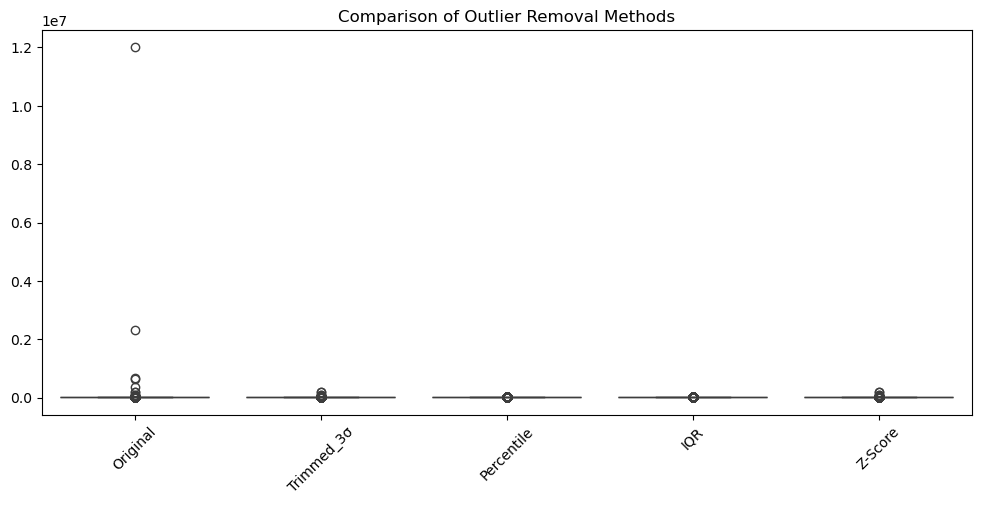

In [23]:
plt.figure(figsize=(12,5))
sns.boxplot(data=pd.DataFrame({
    'Original': df.price_per_sqft,
    'Trimmed_3σ': df_trimmed.price_per_sqft,
    'Percentile': df_perc.price_per_sqft,
    'IQR': df_iqr.price_per_sqft,
    'Z‑Score': df_z.price_per_sqft
}))
plt.xticks(rotation=45)
plt.title("Comparison of Outlier Removal Methods")
plt.show()

 based on this iqr method is best

 Q4. Draw histplot to check the normality of the column(price per sqft column) and perform transformations if needed. 
Check the skewness and kurtosis before and after the transformation.

Before transformation: 0.977839864547141 0.7166920949930122


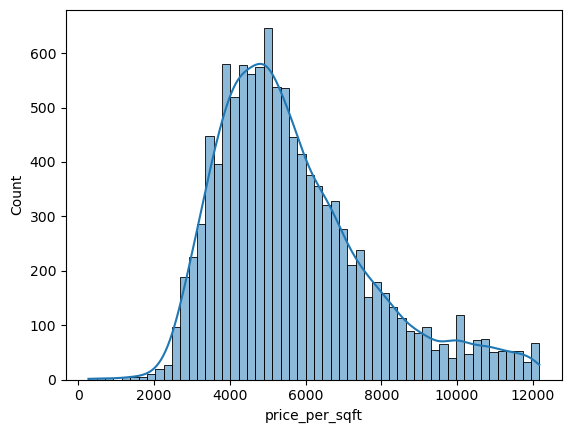

In [25]:
plt.figure()
sns.histplot(df_iqr.price_per_sqft, kde=True)
print("Before transformation:", df_iqr.price_per_sqft.skew(), df_iqr.price_per_sqft.kurt())

C:\Users\USER\AppData\Local\Temp\ipykernel_30688\3761563444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iqr['log_pps'] = np.log(df_iqr.price_per_sqft)


After transformation: -0.10745433189315542 1.3100307783997556


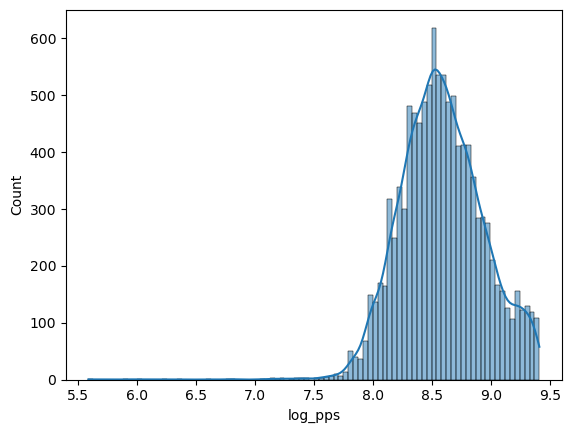

In [27]:
df_iqr['log_pps'] = np.log(df_iqr.price_per_sqft)
plt.figure()
sns.histplot(df_iqr.log_pps, kde=True)
print("After transformation:", df_iqr.log_pps.skew(), df_iqr.log_pps.kurt())
plt.show()

 Q5. Check the correlation between all the numerical columns and plot heatmap. 

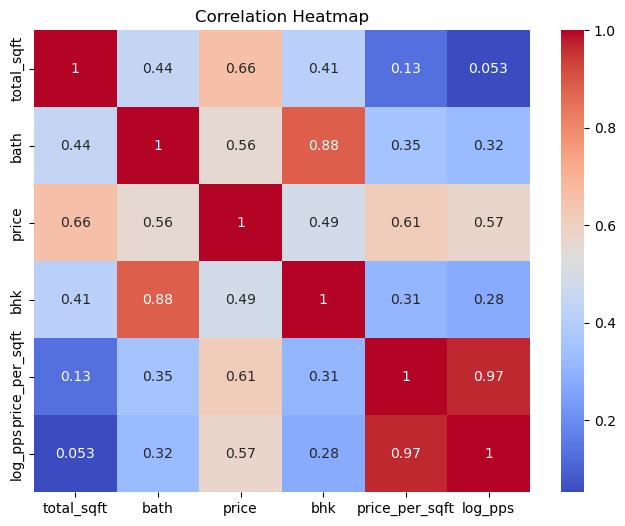

In [29]:
corr = df_iqr.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Q6. Draw Scatter plot between the variables to check the correlation between them.

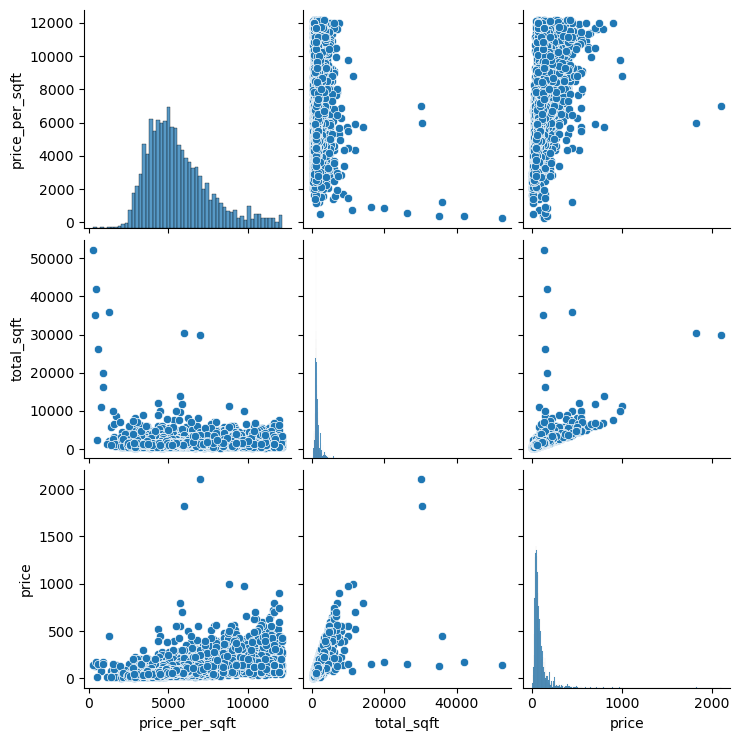

In [35]:
sns.pairplot(df_iqr[['price_per_sqft', 'total_sqft', 'price']])
plt.show()
